In [1]:
import pandas as pd
import matplotlib as mpl
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta

In [2]:
stock = input("Enter the stock (ticker) you want information for: ")

Enter the stock (ticker) you want information for: AAPL


In [3]:
start =(date.today()-timedelta(150))
end = date.today()
df = web.DataReader(stock, 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-25,133.889999,132.809998,133.460007,133.110001,70783700.0,132.717178
2021-06-28,135.250000,133.350006,133.410004,134.779999,62111300.0,134.382248
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.927673
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.555817
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.864899
...,...,...,...,...,...,...
2021-11-16,151.490005,149.339996,149.940002,151.000000,59256200.0,151.000000
2021-11-17,155.000000,150.990005,151.000000,153.490005,88807000.0,153.490005
2021-11-18,158.669998,153.050003,153.710007,157.869995,137827700.0,157.869995


In [4]:
#find the 30 day moving average for price

df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=30).mean()

#find moving average volume last 30 days

df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()

In [5]:
df=df[df['Price_Moving_Avg'].notna()]
df

,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg
Date,,,,,,,,
2021-08-06,147.110001,145.630005,146.350006,146.139999,54067400.0,145.927017,143.653433,8.213963e+07
2021-08-09,146.699997,145.520004,146.199997,146.089996,48908700.0,145.877090,144.092096,8.141047e+07
2021-08-10,147.710007,145.300003,146.440002,145.600006,69023100.0,145.387817,144.458949,8.164086e+07
2021-08-11,146.720001,145.529999,146.050003,145.860001,48493500.0,145.647430,144.782941,8.110544e+07
2021-08-12,149.050003,145.839996,146.190002,148.889999,72282600.0,148.673019,145.186847,8.140615e+07
...,...,...,...,...,...,...,...,...
2021-11-16,151.490005,149.339996,149.940002,151.000000,59256200.0,151.000000,147.665501,6.717275e+07
2021-11-17,155.000000,150.990005,151.000000,153.490005,88807000.0,153.490005,148.055399,6.735895e+07
2021-11-18,158.669998,153.050003,153.710007,157.869995,137827700.0,157.869995,148.548360,6.989545e+07


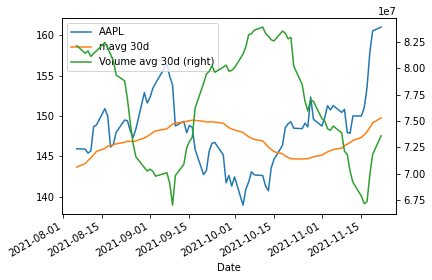

In [6]:
#plt the moving average
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]

#Adjusting the size of matplotlib
mpl.rc('figure', figsize=(15, 10))



close_price.plot(label=stock, legend=True)
mavgplot.plot(label= 'mavg 30d', legend=True)
vmagplot.plot(secondary_y = True, label='Volume avg 30d', legend=True);

In [7]:
#new column that shows if the Price Moving Average is higher than the current price
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])

#create column that shows if the volume on theat each was higher than the 30 day moving average
df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

<ipython-input-7-ca2dcd9e3bdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
<ipython-input-7-ca2dcd9e3bdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])
